In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', 500)
sns.set(style="darkgrid")

tf_color = {True: "green", False: "red"}
type_color = {"I": "red", "S": "blue", "F": "yellow", "C": "green"}

# Task Data #

The task data is parsed first.

In [2]:
task_df = pd.read_csv('../data/processed/task_data.csv')
task_df

,p_number,major,screen_size,t1_type,t1_isSuccess,t1_numWords,t2_type,t2_isSuccess,t2_numWords,t3_type,t3_isSuccess,t3_numWords,t4_type,t4_isSuccess,t4_numWords,t5_type,t5_isSuccess,t5_numWords,t6_type,t6_isSuccess,t6_numWords,t7_type,t7_isSuccess,t7_numWords,t8_type,t8_isSuccess,t8_numWords,t9_type,t9_isSuccess,t9_numWords,t10_type,t10_isSuccess,t10_numWords
0,1,Education,Small,C,True,6,F,True,4,F,True,4,C,True,5,C,True,3,C,True,6,C,True,4,C,True,2,C,True,11,F,True,2
1,2,Computer Science,Medium,C,True,7,C,True,7,C,True,5,C,True,6,C,True,9,C,True,6,C,True,5,C,True,3,C,False,2,C,True,7
2,3,Education,Large,F,True,3,F,True,4,F,True,4,C,True,7,F,True,2,F,True,4,C,True,3,C,True,2,F,True,8,C,True,3
3,4,Education,Small,C,True,3,C,True,6,C,True,5,C,True,6,C,True,3,S,False,1,S,True,1,F,True,2,I,False,0,C,True,3
4,5,Education,Medium,C,True,4,F,True,4,F,True,5,C,True,6,C,True,6,C,True,6,S,True,1,C,True,4,C,False,5,F,True,3
5,6,Computer Science,Large,F,True,6,C,True,5,F,True,4,F,True,5,F,True,6,F,True,6,F,True,6,C,True,2,C,True,2,F,True,8
6,7,Education,Small,F,True,3,F,True,4,C,True,5,C,True,6,C,True,7,C,True,6,C,True,6,C,True,2,C,True,13,F,True,5
7,8,Computer Science,Medium,F,True,4,F,True,3,F,True,2,F,True,8,C,True,7,F,True,5,F,True,5,C,True,2,F,True,11,F,True,6
8,9,Computer Science,Large,C,True,6,C,True,6,C,True,4,F,True,5,C,True,4,C,True,7,C,True,4,C,True,5,C,True,11,C,True,6
9,10,Education,Small,F,True,4,F,True,3,F,True,4,F,True,5,F,True,4,C,True,7,F,True,4,C,True,2,F,True,7,C,True,6


## All Data Descriptive Stats ##

First, descriptive stats about all the data are calculated. For the length of response, numerical stats are calculated (i.e., mean, SD, etc.). For type and success, counts of each value are calculated, as these variables are categorical.

In [3]:
num_words = task_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
types     = task_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
success   = task_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]

In [4]:
num_words.describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,4.500000,4.555556,4.444444,6.222222,5.833333,5.555556,4.333333,2.888889,7.111111,5.055556
std,1.294786,1.503808,1.464169,1.555089,2.036433,1.542428,1.533930,1.131833,4.213269,1.862074
min,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000
25%,3.250000,4.000000,4.000000,5.000000,4.250000,5.000000,4.000000,2.000000,3.500000,3.000000
50%,4.000000,4.500000,4.000000,6.000000,6.000000,6.000000,4.500000,2.000000,7.500000,5.500000
75%,5.750000,6.000000,5.000000,7.000000,7.000000,6.000000,5.000000,4.000000,11.000000,6.750000
max,7.000000,7.000000,9.000000,10.000000,9.000000,8.000000,7.000000,5.000000,13.000000,8.000000


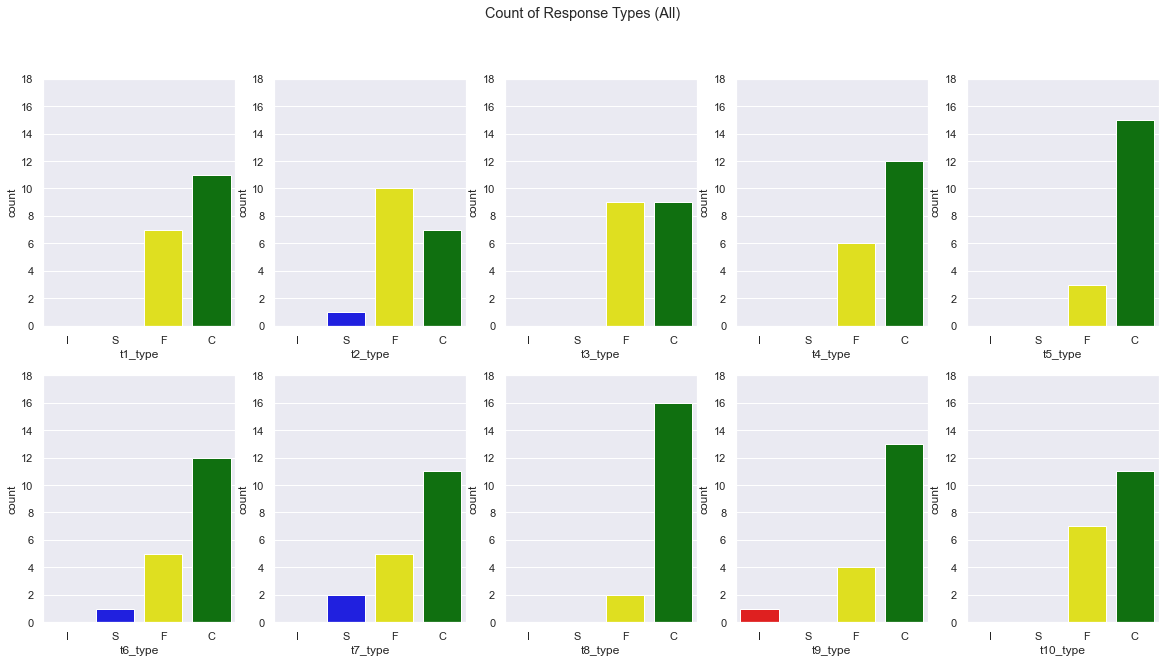

In [5]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (All)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=types)
    ax.set_ylim(0, 18)
    
    index = index + 1
    
plt.savefig("../figures/type_all.png", bbox_inches="tight")

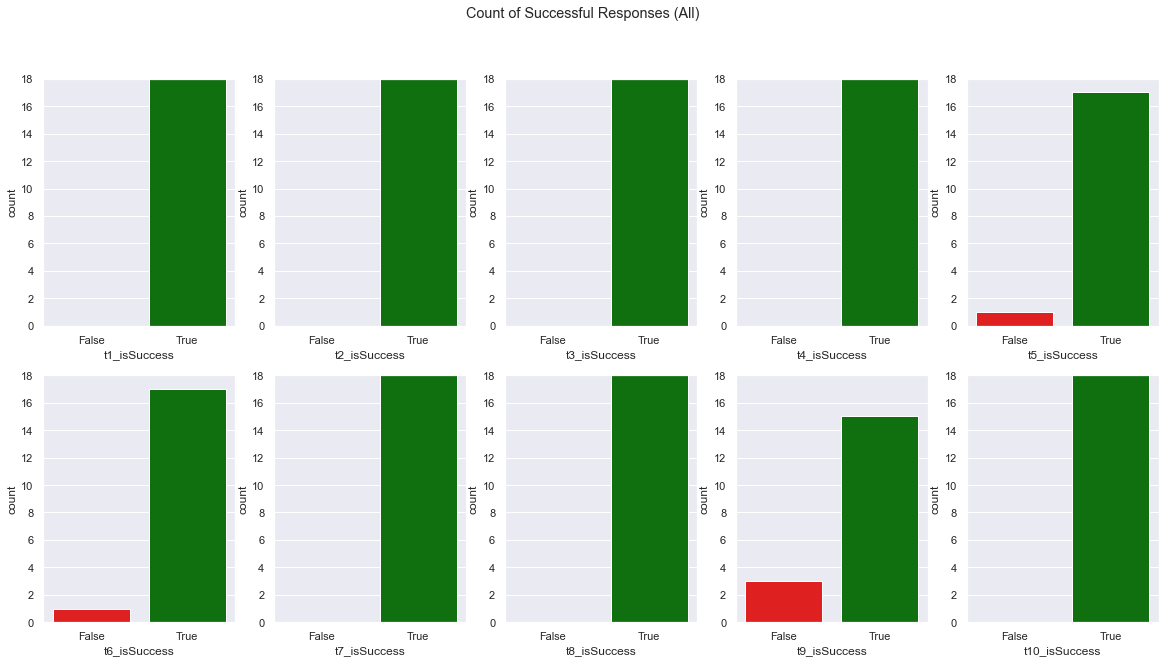

In [6]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (All)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=success)
    ax.set_ylim(0, 18)
    
    index = index + 1

plt.savefig("../figures/success_all.png", bbox_inches="tight")

## Descriptive Stats by Screen Size ##

The data is now broken up by screen size. This is done to answer the research question about screen size having an impact on the data.

### Screen Size Breakdown ###

In [7]:
small_df = task_df[task_df["screen_size"] == "Small"]
med_df   = task_df[task_df["screen_size"] == "Medium"]
large_df = task_df[task_df["screen_size"] == "Large"]

In [8]:
sizes = task_df["screen_size"].value_counts()
sizes

Medium    6
Small     6
Large     6
Name: screen_size, dtype: int64

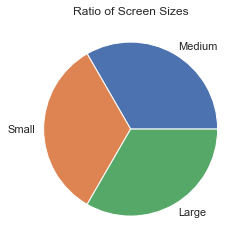

In [9]:
fig = plt.figure(facecolor="white", figsize=(4,4))
ax = sizes.plot.pie(title="Ratio of Screen Sizes")
ax.set_ylabel("")

plt.savefig("../figures/size_ratio.png", bbox_inches="tight")

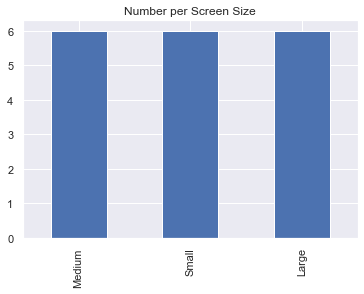

In [10]:
sizes.plot(kind="bar", title="Number per Screen Size")

plt.savefig("../figures/size_count.png", bbox_inches="tight")

In [11]:
small_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000
mean,4.000000,4.333333,4.333333,6.333333,4.833333,5.000000,4.00000,2.833333,8.333333,4.333333
std,1.095445,1.032796,0.516398,1.861899,1.834848,2.097618,1.67332,1.329160,4.546061,1.966384
min,3.000000,3.000000,4.000000,5.000000,3.000000,1.000000,1.00000,2.000000,0.000000,2.000000
25%,3.250000,4.000000,4.000000,5.250000,3.250000,5.000000,4.00000,2.000000,7.500000,3.000000
50%,4.000000,4.000000,4.000000,6.000000,4.500000,5.500000,4.00000,2.000000,9.500000,4.000000
75%,4.000000,4.750000,4.750000,6.000000,6.500000,6.000000,4.75000,3.500000,10.750000,5.750000
max,6.000000,6.000000,5.000000,10.000000,7.000000,7.000000,6.00000,5.000000,13.000000,7.000000


In [12]:
med_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.833333,4.500000,4.666667,6.166667,6.833333,5.833333,4.500000,2.833333,6.500000,4.833333
std,1.471960,2.258318,2.422120,1.722401,1.471960,1.329160,1.974842,0.983192,3.674235,1.722401
min,3.000000,1.000000,2.000000,3.000000,5.000000,4.000000,1.000000,2.000000,2.000000,3.000000
25%,4.000000,3.250000,3.250000,6.000000,6.000000,5.250000,4.250000,2.000000,5.000000,3.250000
50%,4.500000,5.000000,4.500000,6.500000,6.500000,6.000000,5.000000,2.500000,5.000000,5.000000
75%,5.750000,6.000000,5.000000,7.000000,7.750000,6.000000,5.000000,3.750000,9.500000,6.000000
max,7.000000,7.000000,9.000000,8.000000,9.000000,8.000000,7.000000,4.000000,11.000000,7.000000


In [13]:
large_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,4.666667,4.833333,4.333333,6.166667,5.833333,5.833333,4.500000,3.000000,6.50000,6.000000
std,1.366260,1.169045,1.032796,1.329160,2.483277,1.169045,1.048809,1.264911,4.84768,1.788854
min,3.000000,3.000000,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,2.00000,3.000000
25%,3.500000,4.250000,4.000000,5.000000,4.500000,5.250000,4.000000,2.000000,2.25000,5.250000
50%,5.000000,5.000000,4.000000,6.000000,6.500000,6.000000,4.500000,2.500000,5.50000,6.500000
75%,5.750000,5.750000,4.750000,7.000000,7.000000,6.750000,5.000000,3.750000,10.25000,7.000000
max,6.000000,6.000000,6.000000,8.000000,9.000000,7.000000,6.000000,5.000000,13.00000,8.000000


### Categories ###

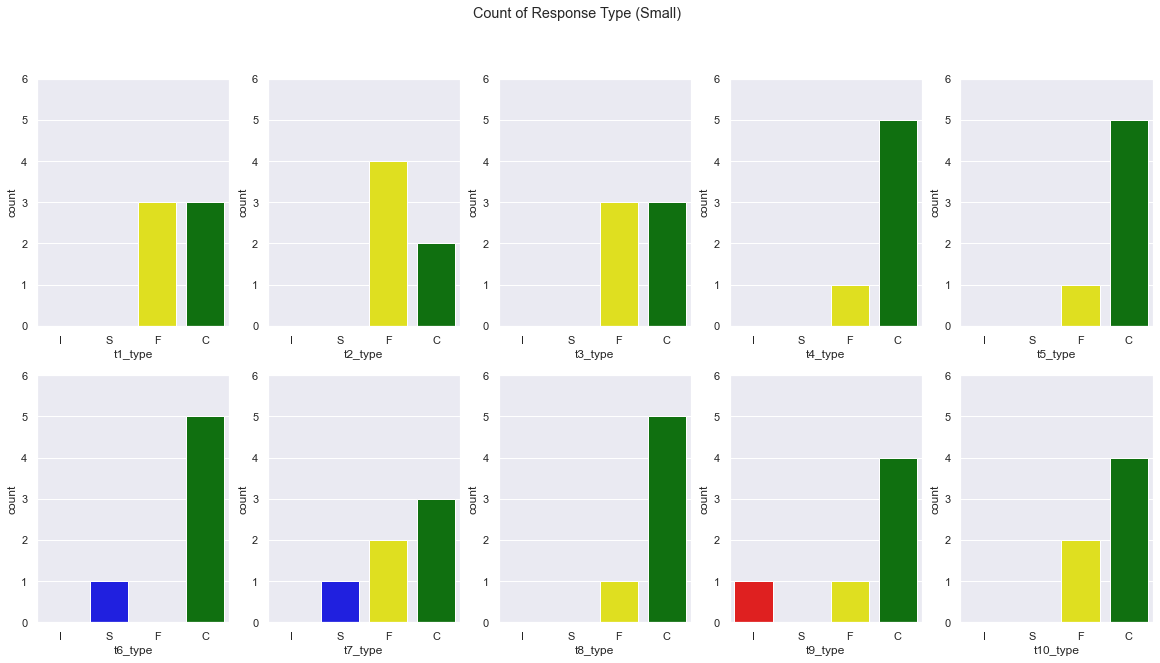

In [14]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Type (Small)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=small_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/type_small.png", bbox_inches="tight")

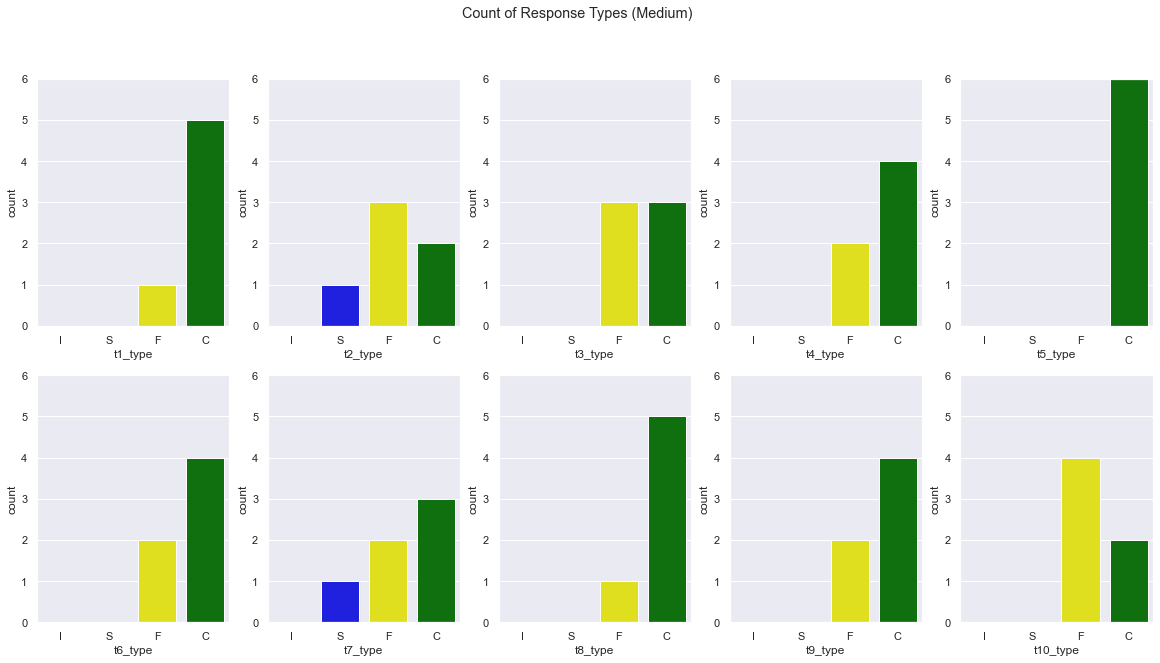

In [15]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Medium)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=med_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/type_med.png", bbox_inches="tight")

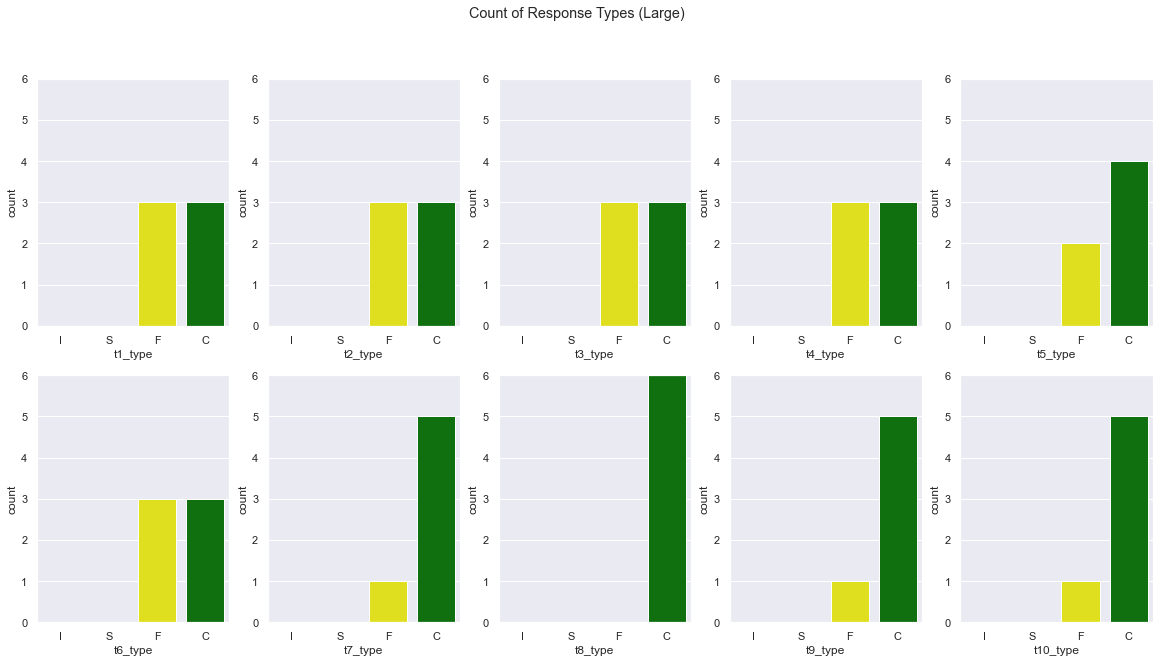

In [16]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Large)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=large_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/type_large.png", bbox_inches="tight")

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task and each screen size is calculated.

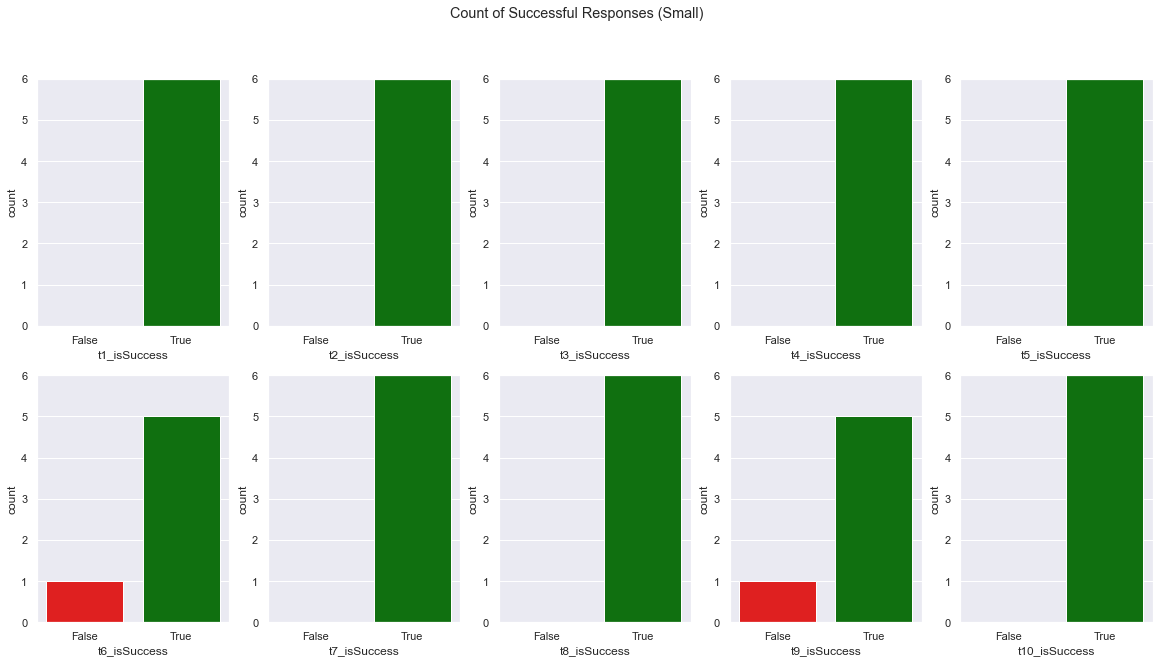

In [17]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Small)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=small_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/success_small.png", bbox_inches="tight")

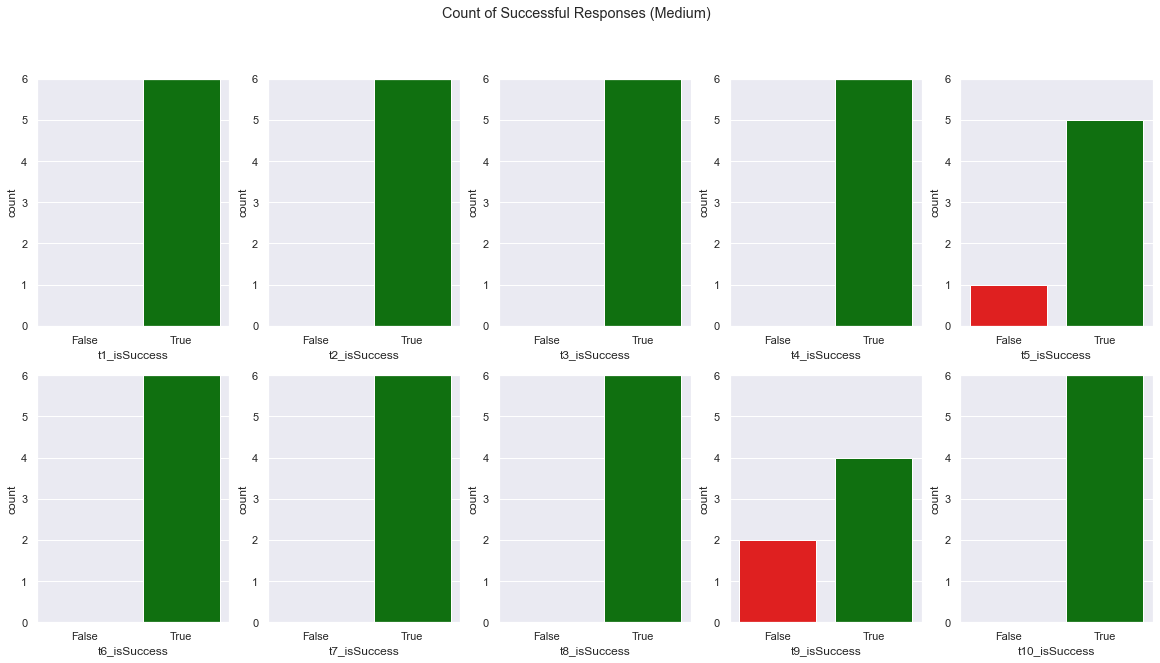

In [18]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Medium)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=med_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/success_med.png", bbox_inches="tight")

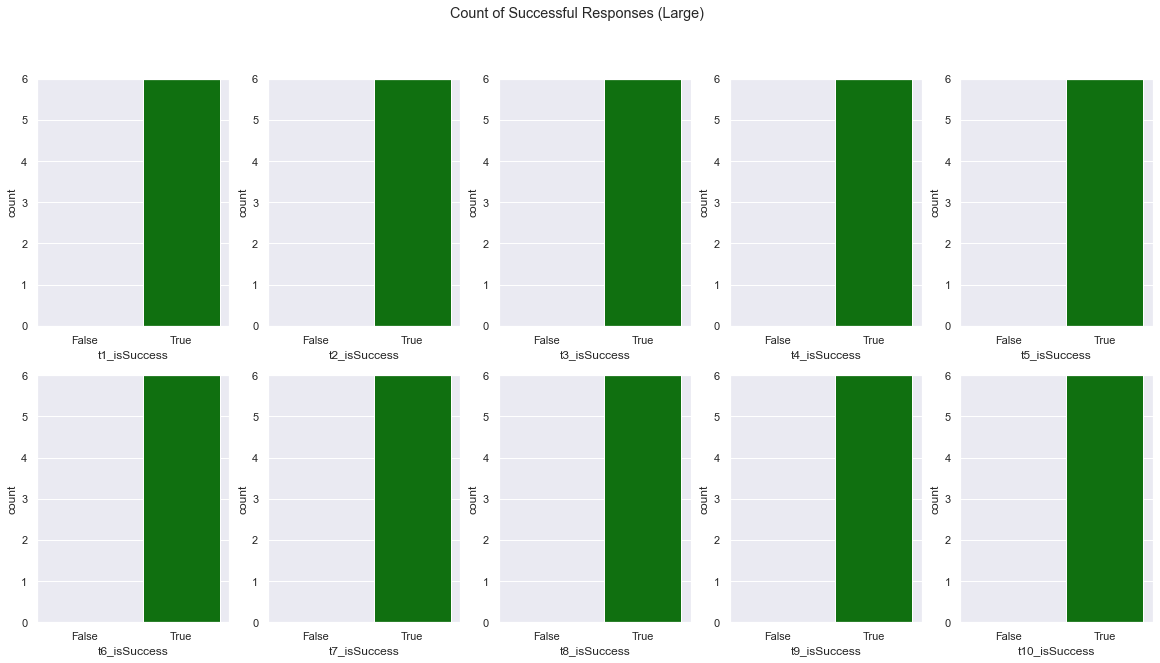

In [19]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Large)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=large_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/success_large.png", bbox_inches="tight")

## Descriptive Stats by Major ##

The data is now broken up by major. This is done to answer the research question about major having an impact on the data.

### Major Breakdown ###

In [20]:
cs_df = task_df[task_df["major"] == "Computer Science"]
ed_df = task_df[task_df["major"] == "Education"]

In [21]:
majors = task_df["major"].value_counts()
majors

Education           12
Computer Science     6
Name: major, dtype: int64

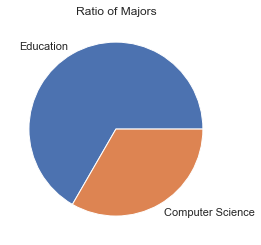

In [22]:
fig = plt.figure(facecolor="white")
ax = majors.plot.pie(title="Ratio of Majors")
ax.set_ylabel("")

plt.savefig("../figures/major_ratio.png", bbox_inches="tight")

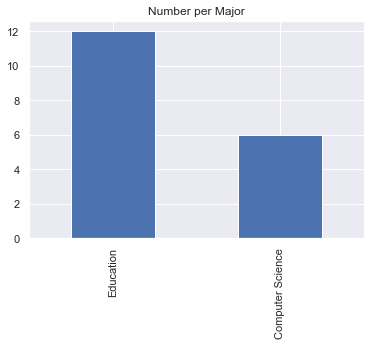

In [23]:
majors.plot(kind="bar", title="Number per Major")

plt.savefig("../figures/major_count.png", bbox_inches="tight")

In [24]:
cs_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.333333,5.333333,4.500000,6.333333,6.833333,5.833333,5.333333,2.666667,6.500000,6.666667
std,1.505545,1.366260,2.428992,1.211060,1.722401,0.752773,1.032796,1.211060,4.929503,0.816497
min,3.000000,3.000000,2.000000,5.000000,4.000000,5.000000,4.000000,2.000000,2.000000,6.000000
25%,4.500000,5.000000,3.250000,5.250000,6.250000,5.250000,5.000000,2.000000,2.000000,6.000000
50%,6.000000,5.500000,4.000000,6.500000,7.000000,6.000000,5.000000,2.000000,6.500000,6.500000
75%,6.000000,6.000000,4.750000,7.000000,7.750000,6.000000,5.750000,2.750000,11.000000,7.000000
max,7.000000,7.000000,9.000000,8.000000,9.000000,7.000000,7.000000,5.000000,11.000000,8.000000


In [25]:
ed_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].describe()

,t1_numWords,t2_numWords,t3_numWords,t4_numWords,t5_numWords,t6_numWords,t7_numWords,t8_numWords,t9_numWords,t10_numWords
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.083333,4.166667,4.416667,6.166667,5.333333,5.416667,3.833333,3.000000,7.416667,4.250000
std,0.996205,1.466804,0.792961,1.749459,2.059715,1.831955,1.527525,1.128152,4.010403,1.712255
min,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000
25%,3.000000,3.750000,4.000000,5.000000,3.750000,4.750000,3.750000,2.000000,5.000000,3.000000
50%,4.000000,4.000000,4.000000,6.000000,5.500000,6.000000,4.000000,2.500000,7.500000,3.500000
75%,5.000000,5.250000,5.000000,7.000000,7.000000,6.250000,5.000000,4.000000,10.250000,5.250000
max,6.000000,6.000000,6.000000,10.000000,9.000000,8.000000,6.000000,5.000000,13.000000,7.000000


### Categories ###

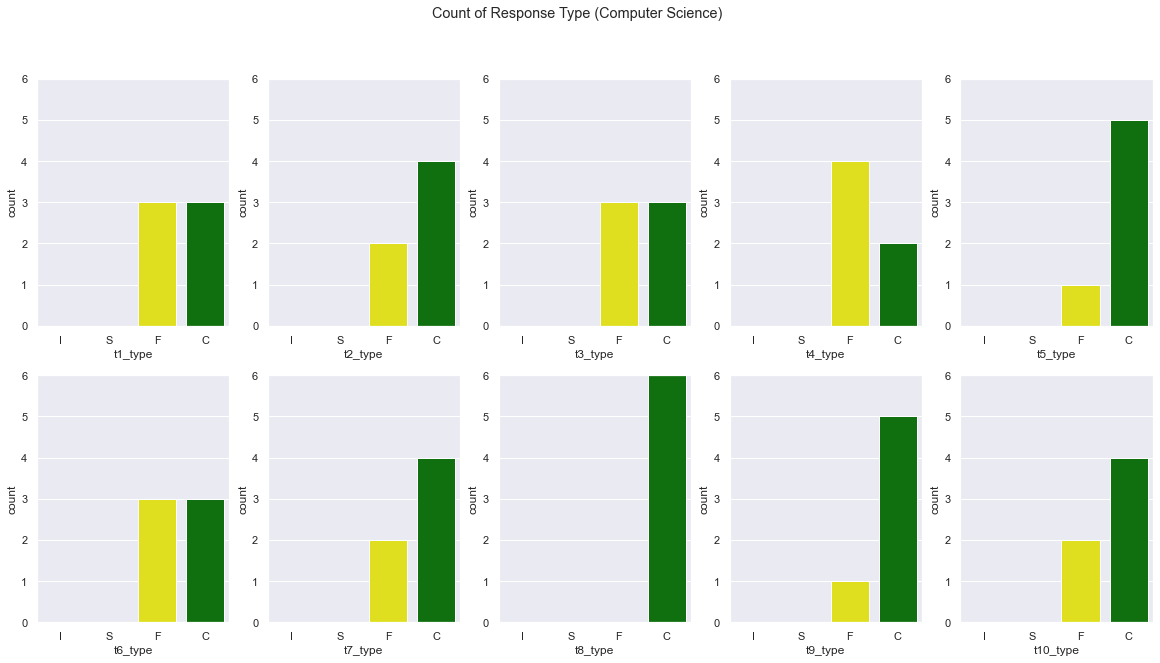

In [26]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Type (Computer Science)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=cs_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/type_cs.png", bbox_inches="tight")

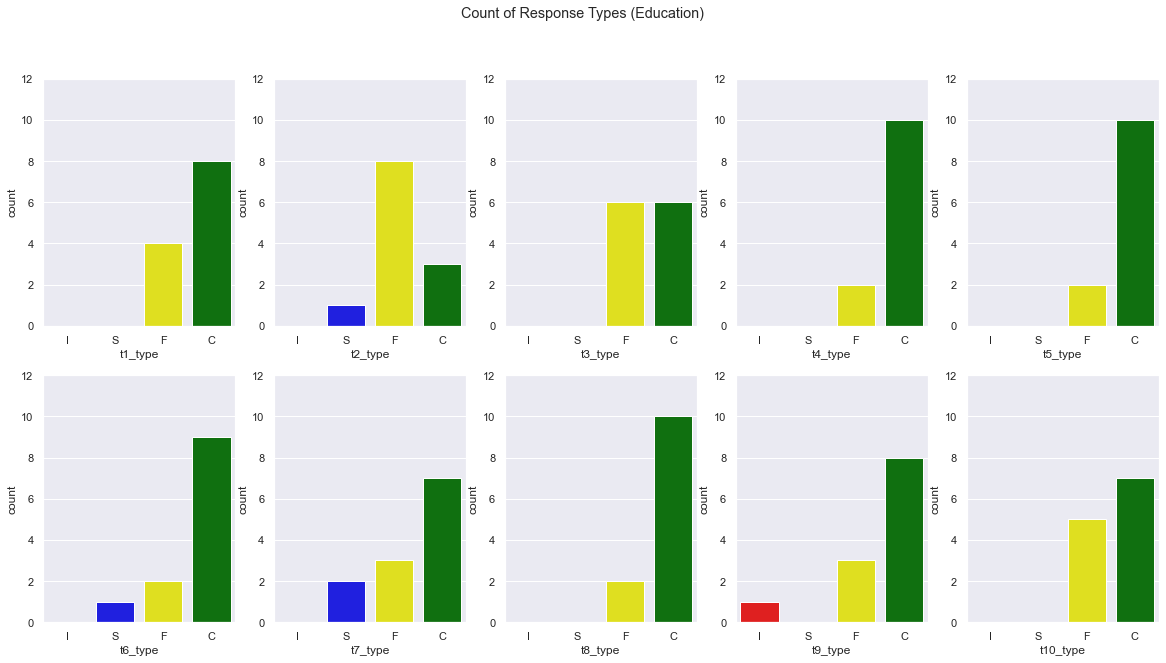

In [27]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Response Types (Education)")
index = 1

cols = ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=type_color, order=["I", "S", "F", "C"], data=ed_df)
    ax.set_ylim(0, 12)
    
    index = index + 1
    
plt.savefig("../figures/type_ed.png", bbox_inches="tight")

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task and each screen size is calculated.

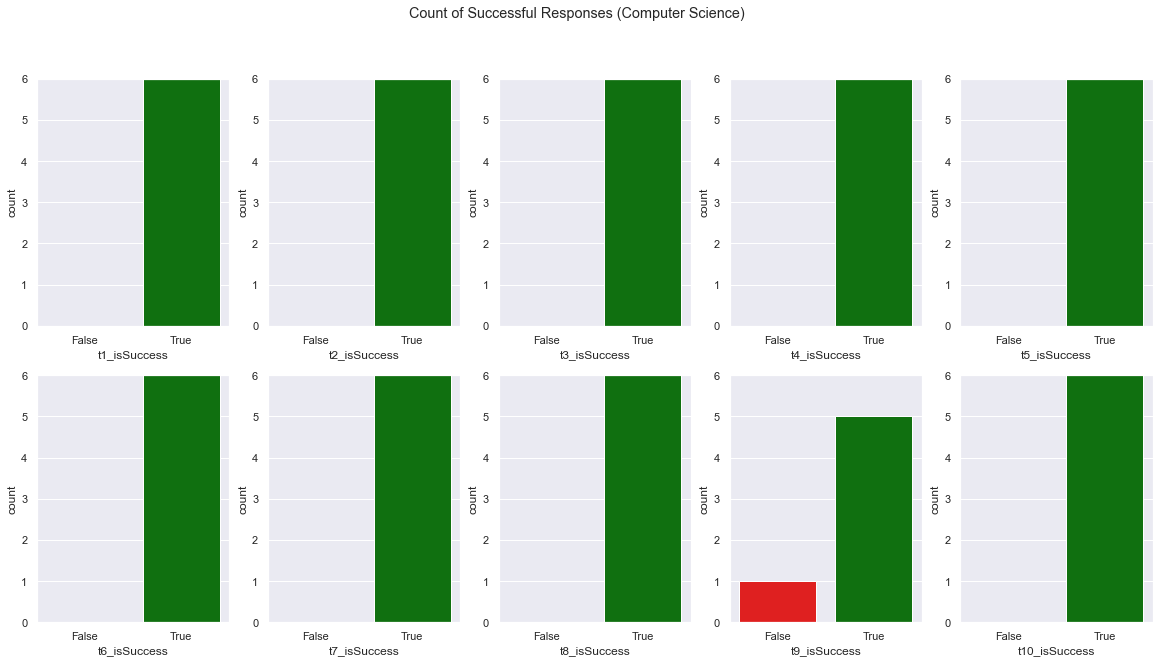

In [28]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Computer Science)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=cs_df)
    ax.set_ylim(0, 6)
    
    index = index + 1
    
plt.savefig("../figures/success_cs.png", bbox_inches="tight")

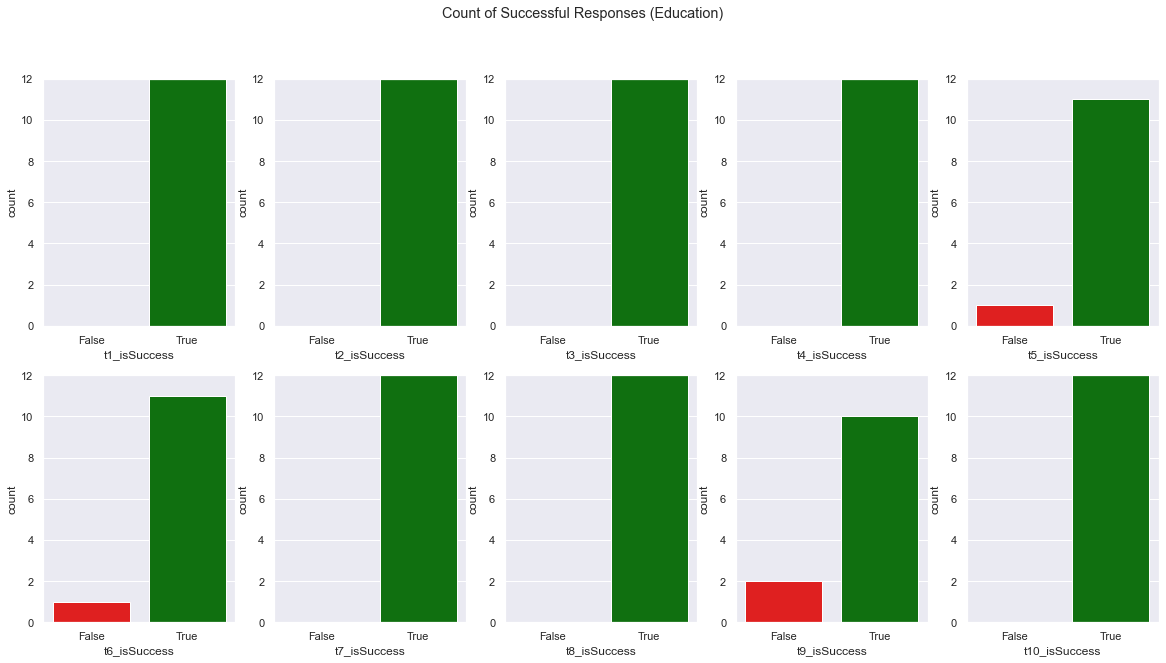

In [29]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("Count of Successful Responses (Education)")
index = 1

cols = ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]
for c in cols:
    plt.subplot(2, 5, index)
    ax = sns.countplot(x=c, palette=tf_color, order=[False, True], data=ed_df)
    ax.set_ylim(0, 12)
    
    index = index + 1
    
plt.savefig("../figures/success_ed.png", bbox_inches="tight")

# Inferrential Stats #

This section calculates inferrential stats, looking for significant differences betweens screen sizes and major

## Screen Size ##

### Kruskal-Wallis ###

Due to the small sample size, we also try the non-parametric equivalent of ANOVA.

In [30]:
small = small_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
med   = med_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
large = large_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]

In [31]:
for label in ["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]:
    print(label, stats.kruskal(small[label], med[label], large[label]))

t1_numWords KruskalResult(statistic=1.2664845173041952, pvalue=0.5308677969758013)
t2_numWords KruskalResult(statistic=0.47991313789359263, pvalue=0.7866620258849406)
t3_numWords KruskalResult(statistic=0.01311728395060172, pvalue=0.9934628189731214)
t4_numWords KruskalResult(statistic=0.2993827160493762, pvalue=0.8609736680347508)
t5_numWords KruskalResult(statistic=2.5412681544456097, pvalue=0.2806536092863641)
t6_numWords KruskalResult(statistic=0.49220489977728155, pvalue=0.7818421211839877)
t7_numWords KruskalResult(statistic=0.578037904124854, pvalue=0.7489980102111085)
t8_numWords KruskalResult(statistic=0.12878787878787376, pvalue=0.9376355551838235)
t9_numWords KruskalResult(statistic=0.5726315789473629, pvalue=0.7510254125759346)
t10_numWords KruskalResult(statistic=2.592133620689655, pvalue=0.2736058230603725)


### Fisher Exact ###

When making a contingency table, some cells will have a count of zero. This leads us to use the Fisher Exact test. To make the 2x2 tables required for this test, the ordinal nature of the data is used to make a total of six tables.

#### Response Type ####

In [32]:
small = small_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
med   = med_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
large = large_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]

First, we need to make a table of the counts by type and grid size

In [33]:
tasks = []
for label in ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]:

    t = {}

    s_row = []
    m_row = []
    l_row = []

    s = small[label].value_counts()
    m = med[label].value_counts()
    l = large[label].value_counts()
    
    for c in ["I", "S", "F", "C"]:
        if c in s.index:
            s_row.append(s[c])
        else:
            s_row.append(0)

        if c in m.index:
            m_row.append(m[c])
        else:
            m_row.append(0)

        if c in l.index:
            l_row.append(l[c])
        else:
            l_row.append(0)

    t["small"] = s_row
    t["medium"] = m_row
    t["large"] = l_row
    
    tasks.append(t)
    
tasks

[{'small': [0, 0, 3, 3], 'medium': [0, 0, 1, 5], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 4, 2], 'medium': [0, 1, 3, 2], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 3, 3], 'medium': [0, 0, 3, 3], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 2, 4], 'large': [0, 0, 3, 3]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 0, 6], 'large': [0, 0, 2, 4]},
 {'small': [0, 1, 0, 5], 'medium': [0, 0, 2, 4], 'large': [0, 0, 3, 3]},
 {'small': [0, 1, 2, 3], 'medium': [0, 1, 2, 3], 'large': [0, 0, 1, 5]},
 {'small': [0, 0, 1, 5], 'medium': [0, 0, 1, 5], 'large': [0, 0, 0, 6]},
 {'small': [1, 0, 1, 4], 'medium': [0, 0, 2, 4], 'large': [0, 0, 1, 5]},
 {'small': [0, 0, 2, 4], 'medium': [0, 0, 4, 2], 'large': [0, 0, 1, 5]}]

In [34]:
totals = {}

s_sums = []
m_sums = []
l_sums = []

for i in range(4):
    s_count = 0
    m_count = 0
    l_count = 0
    
    for task in tasks:
        s_count = s_count + task["small"][i]
        m_count = m_count + task["medium"][i]
        l_count = l_count + task["large"][i]
        
    s_sums.append(s_count)
    m_sums.append(m_count)
    l_sums.append(l_count)
    
totals["small"] = s_sums
totals["medium"] = m_sums
totals["large"] = l_sums

totals

{'small': [1, 2, 18, 39], 'medium': [0, 2, 20, 38], 'large': [0, 0, 20, 40]}

In [35]:
df = pd.DataFrame(data=totals).rename({0:"I", 1:"S", 2:"F", 3:"C"})
df

,small,medium,large
I,1,0,0
S,2,2,0
F,18,20,20
C,39,38,40


Next, we need to make the contingency tables in the 2x2 format needed for the Fisher test.

In [36]:
table_list = []

for i in range(1, len(df.index)):
    table = {}
    
    col = df["small"]
    col2 = df[["medium", "large"]]

    table["=S"] = [col.iloc[:i].sum(), col.iloc[i:].sum()]
    table[">S"] = [col2.iloc[:i].sum().sum(), col2.iloc[i:].sum().sum()]

    table_list.append(table)

    table = {}

    col = df[["small", "medium"]]
    col2 = df["large"]

    table["<=M"] = [col.iloc[:i].sum().sum(), col.iloc[i:].sum().sum()]
    table[">M"] = [col2.iloc[:i].sum(), col2.iloc[i:].sum()]

    table_list.append(table)
        
table_list

[{'=S': [1, 59], '>S': [0, 120]},
 {'<=M': [1, 119], '>M': [0, 60]},
 {'=S': [3, 57], '>S': [2, 118]},
 {'<=M': [5, 115], '>M': [0, 60]},
 {'=S': [21, 39], '>S': [42, 78]},
 {'<=M': [43, 77], '>M': [20, 40]}]

In [37]:
df_list = []

for i in range(len(table_list)):
    temp = pd.DataFrame(table_list[i])
    
    if i in [0, 1]:
        temp = temp.rename({0: "=I", 1:">I"})
    elif i in [2, 3]:
        temp = temp.rename({0: "<=S", 1:">S"})
    else:
        temp = temp.rename({0: "<=F", 1:">F"})
        
    df_list.append(temp)
        
df_list

[    =S   >S
 =I   1    0
 >I  59  120,
     <=M  >M
 =I    1   0
 >I  119  60,
      =S   >S
 <=S   3    2
 >S   57  118,
      <=M  >M
 <=S    5   0
 >S   115  60,
      =S  >S
 <=F  21  42
 >F   39  78,
      <=M  >M
 <=F   43  20
 >F    77  40]

Now, we can actually run the test!

In [38]:
p_values = []
for df in df_list:
    oddsration, p_value = stats.fisher_exact(df)
    p_values.append(p_value)
    
p_values

[0.3333333333333531,
 1.0,
 0.33508235325445557,
 0.17097501916408664,
 1.0,
 0.8684775229248227]

In [39]:
sm.stats.multipletests(p_values, method="holm")

(array([False, False, False, False, False, False]),
 array([1., 1., 1., 1., 1., 1.]),
 0.008512444610847103,
 0.008333333333333333)

#### Successful Response ####

First, we need to make a table of the counts by success and grid size

In [40]:
small = small_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]
med   = med_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]
large = large_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]

In [41]:
responses = []

for label in ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]:
    r = {}
    
    s_row = []
    m_row = []
    l_row = []
    
    s = small[label].value_counts()
    m = med[label].value_counts()
    l = large[label].value_counts()
    
    for c in [False, True]:
        if c in s.index:
            s_row.append(s[c])
        else:
            s_row.append(0)

        if c in m.index:
            m_row.append(m[c])
        else:
            m_row.append(0)

        if c in l.index:
            l_row.append(l[c])
        else:
            l_row.append(0)
            
    r["small"] = s_row
    r["medium"] = m_row
    r["large"] = l_row
    
    responses.append(r)
    
responses

[{'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [1, 5], 'large': [0, 6]},
 {'small': [1, 5], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]},
 {'small': [1, 5], 'medium': [2, 4], 'large': [0, 6]},
 {'small': [0, 6], 'medium': [0, 6], 'large': [0, 6]}]

In [42]:
totals = {}

s_sums = []
m_sums = []
l_sums = []

for i in range(2):
    s_count = 0
    m_count = 0
    l_count = 0
    
    for response in responses:
        s_count = s_count + response["small"][i]
        m_count = m_count + response["medium"][i]
        l_count = l_count + response["large"][i]
        
    s_sums.append(s_count)
    m_sums.append(m_count)
    l_sums.append(l_count)
    
totals["small"] = s_sums
totals["medium"] = m_sums
totals["large"] = l_sums

totals

{'small': [2, 58], 'medium': [3, 57], 'large': [0, 60]}

In [43]:
df = pd.DataFrame(data=totals).rename({0:"False", 1:"True"})
df

,small,medium,large
False,2,3,0
True,58,57,60


Next, we need to make the contingency tables in the 2x2 format needed for the Fisher test.

In [44]:
table_list = []

for i in range(1, len(df.index)):
    table = {}
    
    col = df["small"]
    col2 = df[["medium", "large"]]

    table["S"] = [col.iloc[:i].sum(), col.iloc[i:].sum()]
    table[">S"] = [col2.iloc[:i].sum().sum(), col2.iloc[i:].sum().sum()]

    table_list.append(table)

    table = {}

    col = df[["small", "medium"]]
    col2 = df["large"]

    table["<L"] = [col.iloc[:i].sum().sum(), col.iloc[i:].sum().sum()]
    table["L"] = [col2.iloc[:i].sum(), col2.iloc[i:].sum()]

    table_list.append(table)
        
table_list

[{'S': [2, 58], '>S': [3, 117]}, {'<L': [5, 115], 'L': [0, 60]}]

In [45]:
df_list = []

for i in range(len(table_list)):
    df_list.append(pd.DataFrame(table_list[i]).rename({0: "F", 1: "T"}))
        
df_list

[    S   >S
 F   2    3
 T  58  117,
     <L   L
 F    5   0
 T  115  60]

Now, we can actually run the test!

In [46]:
p_values = []
for df in df_list:
    oddsration, p_value = stats.fisher_exact(df)
    p_values.append(p_value)
    
p_values

[1.0, 0.17097501916408664]

In [47]:
sm.stats.multipletests(p_values, method="holm")

(array([False, False]),
 array([1.        , 0.34195004]),
 0.025320565519103666,
 0.025)

## Major ##

### Kruskal-Wallis ###

Due to the small sample size, we also try the non-parametric equivalent of ANOVA.

In [48]:
cs = cs_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
ed = ed_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]

In [49]:
for label in ["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]:
    print(label, stats.kruskal(cs[label], ed[label]))

t1_numWords KruskalResult(statistic=3.17937158469945, pvalue=0.07457340490188132)
t2_numWords KruskalResult(statistic=2.362649294245385, pvalue=0.12427098264036776)
t3_numWords KruskalResult(statistic=0.41565393518518506, pvalue=0.5191136512609111)
t4_numWords KruskalResult(statistic=0.11342592592592539, pvalue=0.7362769783410716)
t5_numWords KruskalResult(statistic=2.312433581296493, pvalue=0.12834297352662602)
t6_numWords KruskalResult(statistic=0.08518930957683217, pvalue=0.7703844333585914)
t7_numWords KruskalResult(statistic=4.380295429208471, pvalue=0.036356695374751995)
t8_numWords KruskalResult(statistic=0.38636363636362997, pvalue=0.5342170490077567)
t9_numWords KruskalResult(statistic=0.18118421052631006, pvalue=0.670357517777967)
t10_numWords KruskalResult(statistic=6.432246767241373, pvalue=0.011206673046383788)


### Fisher Exact ###

When making a contingency table, some cells will have a count of zero. This leads us to use the Fisher Exact test. To make the 2x2 tables required for this test, the ordinal nature of the data is used to make a total of six tables.

#### Response Type ####

First, we need to make a table of the counts by type and major

In [50]:
cs = cs_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]
ed = ed_df[["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]]

In [51]:
tasks = []
for label in ["t1_type","t2_type","t3_type","t4_type","t5_type","t6_type","t7_type","t8_type","t9_type","t10_type"]:

    t = {}

    c_row = []
    e_row = []

    c = cs[label].value_counts()
    e = ed[label].value_counts()
    
    for val in ["I", "S", "F", "C"]:
        if val in c.index:
            c_row.append(c[val])
        else:
            c_row.append(0)

        if val in e.index:
            e_row.append(e[val])
        else:
            e_row.append(0)

    t["cs"] = c_row
    t["ed"] = e_row
    
    tasks.append(t)
    
tasks

[{'cs': [0, 0, 3, 3], 'ed': [0, 0, 4, 8]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 1, 8, 3]},
 {'cs': [0, 0, 3, 3], 'ed': [0, 0, 6, 6]},
 {'cs': [0, 0, 4, 2], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 1, 5], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 3, 3], 'ed': [0, 1, 2, 9]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 2, 3, 7]},
 {'cs': [0, 0, 0, 6], 'ed': [0, 0, 2, 10]},
 {'cs': [0, 0, 1, 5], 'ed': [1, 0, 3, 8]},
 {'cs': [0, 0, 2, 4], 'ed': [0, 0, 5, 7]}]

In [52]:
totals = {}

c_sums = []
e_sums = []

for i in range(4):
    c_count = 0
    e_count = 0
    
    for task in tasks:
        c_count = c_count + task["cs"][i]
        e_count = e_count + task["ed"][i]
        
    c_sums.append(c_count)
    e_sums.append(e_count)
    
totals["cs"] = c_sums
totals["ed"] = e_sums

totals

{'cs': [0, 0, 21, 39], 'ed': [1, 4, 37, 78]}

In [53]:
df = pd.DataFrame(data=totals).rename({0:"I", 1:"S", 2:"F", 3:"C"})
df

,cs,ed
I,0,1
S,0,4
F,21,37
C,39,78


Next, we need to make the contingency tables in the 2x2 format needed for the Fisher test.

In [54]:
table_list = []

for i in range(1, len(df.index)):
    table = {}
    
    col = df["cs"]
    col2 = df["ed"]

    table["cs"] = [col.iloc[:i].sum(), col.iloc[i:].sum()]
    table["ed"] = [col2.iloc[:i].sum(), col2.iloc[i:].sum()]

    table_list.append(table)
        
table_list

[{'cs': [0, 60], 'ed': [1, 119]},
 {'cs': [0, 60], 'ed': [5, 115]},
 {'cs': [21, 39], 'ed': [42, 78]}]

In [55]:
df_list = []

for i in range(len(table_list)):
    temp = pd.DataFrame(table_list[i])
    
    if i == 0:
        temp = temp.rename({0: "=I", 1:">I"})
    elif i == 1:
        temp = temp.rename({0: "<=S", 1:">S"})
    else:
        temp = temp.rename({0: "<=F", 1:">F"})
        
    df_list.append(temp)
        
df_list

[    cs   ed
 =I   0    1
 >I  60  119,
      cs   ed
 <=S   0    5
 >S   60  115,
      cs  ed
 <=F  21  42
 >F   39  78]

Now, we can actually run the test!

In [56]:
p_values = []
for df in df_list:
    oddsration, p_value = stats.fisher_exact(df)
    p_values.append(p_value)
    
p_values

[1.0, 0.17097501916408664, 1.0]

In [57]:
sm.stats.multipletests(p_values, method="holm")

(array([False, False, False]),
 array([1.        , 0.51292506, 1.        ]),
 0.016952427508441503,
 0.016666666666666666)

#### Successful Response ####

First, we need to make a table of the counts by success and major

In [58]:
cs = cs_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]
ed = ed_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]

In [59]:
responses = []

for label in ["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]:
    r = {}
    
    c_row = []
    e_row = []
    
    c= cs[label].value_counts()
    e= ed[label].value_counts()
    
    for val in [False, True]:
        if val in c.index:
            c_row.append(c[val])
        else:
            c_row.append(0)

        if val in e.index:
            e_row.append(e[val])
        else:
            e_row.append(0)
            
    r["cs"] = c_row
    r["ed"] = e_row
    
    responses.append(r)
    
responses

[{'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [0, 6], 'ed': [1, 11]},
 {'cs': [0, 6], 'ed': [1, 11]},
 {'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [0, 6], 'ed': [0, 12]},
 {'cs': [1, 5], 'ed': [2, 10]},
 {'cs': [0, 6], 'ed': [0, 12]}]

In [60]:
totals = {}

c_sums = []
e_sums = []

for i in range(2):
    c_count = 0
    e_count = 0
    
    for response in responses:
        c_count = c_count + response["cs"][i]
        e_count = e_count + response["ed"][i]
        
    c_sums.append(c_count)
    e_sums.append(e_count)
    
totals["cs"] = c_sums
totals["ed"] = e_sums

totals

{'cs': [1, 59], 'ed': [4, 116]}

In [61]:
df = pd.DataFrame(data=totals).rename({0:"False", 1:"True"})
df

,cs,ed
False,1,4
True,59,116


Since the data is already in a 2x2 table, we can run the test directly.

In [62]:
oddsratio, p_value = stats.fisher_exact(df)
p_value

0.6661264582298831